In [1]:
#step 1: install required tools
!pip install biopython
!apt-get install -y clustalo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 18.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libargtable2-0
The following NEW packages will be installed:
  clustalo libargtable2-0
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 273 kB of archives.
After this operation, 694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libargtable2-0 amd64 13-1.1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalo amd64 1.2.4-7 [259 kB]
Fetched 273 kB in 1s (418 kB/s)
Selecting previously unselected package libargtable2-0.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../libargtable2-0_13-1.1_amd64.deb ...
Unpacking libargtable2-0 (13-1.1) ...
Selecting previously unselected package clustalo.
Preparing to unpack .

In [2]:
#Step 2: import modules
from Bio import SeqIO, AlignIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from collections import Counter
import subprocess

In [4]:
#Step3: Define sequences and write to FASTA file
sequences = [
    SeqRecord(Seq("MKTAYIAKQRQISFVKSHFSRQDILDLWQY"), id="seq1", description=""),
    SeqRecord(Seq("MKALYIAKQRQISFVKSYFSKQDILDLWQY"), id="seq2", description=""),
    SeqRecord(Seq("MKLAYIAKQRQISFVKSHFSRQNILDLWQY"), id="seq3", description="")
]

fasta_file = "input_sequences.fasta"
with open(fasta_file, "w") as f:
    SeqIO.write(sequences, f, "fasta")


In [6]:
#Step4: Run clustal omega alignment
aligned_file = "aligned_output.fasta"
command = f"clustalo -i {fasta_file} -o {aligned_file} --force --outfmt=fasta"
subprocess.run(command, shell=True, check=True)

CompletedProcess(args='clustalo -i input_sequences.fasta -o aligned_output.fasta --force --outfmt=fasta', returncode=0)

In [8]:
#Step5: Read and display aligned sequences
alignment = AlignIO.read(aligned_file, "fasta")
print("\nAligned Sequences:")
for record in alignment:
    print(f"{record.id}: {record.seq}")


Aligned Sequences:
seq1: MKTAYIAKQRQISFVKSHFSRQDILDLWQY
seq2: MKALYIAKQRQISFVKSYFSKQDILDLWQY
seq3: MKLAYIAKQRQISFVKSHFSRQNILDLWQY


In [9]:
#Step 6: Save aligned sequences in clustal format
AlignIO.write(alignment, "aligned_output.aln", "clustal")


1

In [11]:
#Step 7: Identify conserved positions
print("\nConserved Positions:")
for i in range(len(alignment[0])):
  column = [record.seq[i] for record in alignment]
  counts = Counter(column)
  if len(counts) == 1:
      print(f"Position {i+1}: {column[0]} (conserved)")



Conserved Positions:
Position 1: M (conserved)
Position 2: K (conserved)
Position 5: Y (conserved)
Position 6: I (conserved)
Position 7: A (conserved)
Position 8: K (conserved)
Position 9: Q (conserved)
Position 10: R (conserved)
Position 11: Q (conserved)
Position 12: I (conserved)
Position 13: S (conserved)
Position 14: F (conserved)
Position 15: V (conserved)
Position 16: K (conserved)
Position 17: S (conserved)
Position 19: F (conserved)
Position 20: S (conserved)
Position 22: Q (conserved)
Position 24: I (conserved)
Position 25: L (conserved)
Position 26: D (conserved)
Position 27: L (conserved)
Position 28: W (conserved)
Position 29: Q (conserved)
Position 30: Y (conserved)


In [18]:
#Step 8 : Heatmap of conservation across alignment
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Build a matrix of character frequences per column
alignment_array = np.array([list(rec.seq) for rec in alignment])
num_seqs, seq_len = alignment_array.shape

# Count most common characters per column
conservation_scores = []
for i in range(seq_len):
    column = alignment_array[:, i]
    counts = Counter(column)
    most_common = counts.most_common(1)[0][1]
    score = most_common / num_seqs
    conservation_scores.append(score)

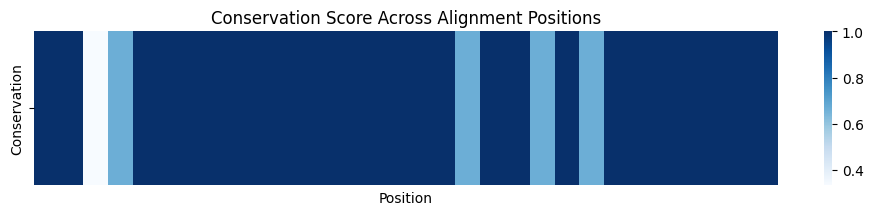

In [20]:
# Plot conservation
plt.figure(figsize=(12, 2))
sns.heatmap([conservation_scores], cmap="Blues", cbar=True, xticklabels=False, yticklabels=["Conservation"])
plt.title("Conservation Score Across Alignment Positions")
plt.xlabel("Position")
plt.show()

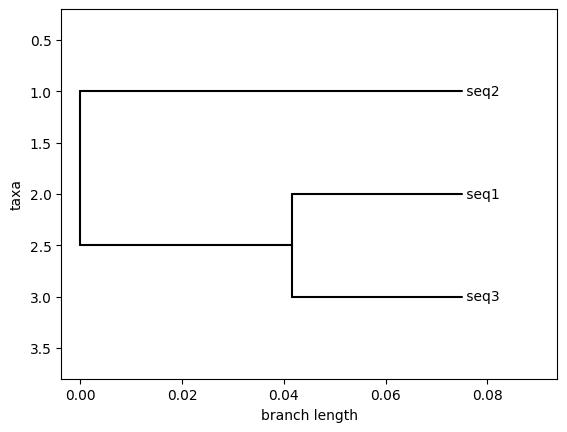

In [42]:
#Step 9: Generate and visualize phylogenetic tree
from Bio import Phylo
import subprocess # Import the subprocess module

#Use the alignment saved in CLUSTAL format
aln_file = "aligned_output.aln"
dnd_file = "alignment.dnd"

# Generate tree using CLUSTAL omega again (outputs .dnd file)
tree_cmd =f"clustalo -i {fasta_file} -o {aln_file} --guidetree-out={dnd_file} --force --outfmt=clustal"
subprocess.run(tree_cmd, shell=True, check=True)

# Read and draw Tree
tree = Phylo.read(dnd_file, "newick")
Phylo.draw(tree)

In [56]:
# Step 10: Print alignment with '*' for conserved positions
print("\nAlignment with conserved positions marked by '*':\n")
for record in alignment:
    print(f"{record.id:<10}: {record.seq}")

#Identify conserved positions
cons_line = ""
for i in range(seq_len):
    col = [record.seq[i] for record in alignment]
    if all(base == col[0] for base in col):
        cons_line += "*"
    else:
        cons_line += " "
print(" " * 11 + cons_line)


Alignment with conserved positions marked by '*':

seq1      : MKTAYIAKQRQISFVKSHFSRQDILDLWQY
seq2      : MKALYIAKQRQISFVKSYFSKQDILDLWQY
seq3      : MKLAYIAKQRQISFVKSHFSRQNILDLWQY
           **  ************* ** * *******
